In [2]:
import pandas as pd

In [3]:
credit_dataset = pd.read_csv("creditcard.csv")

In [4]:
# Displaying the datset
credit_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Checking for missing values
total = credit_dataset.isnull().sum().sort_values(ascending = False)
percent = (credit_dataset.isnull().sum()/credit_dataset.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We find that the preprocessed dataset has no missing values

In [6]:
#Counting the number of transactions in Class 0 (No fraud) and Class 1 (Fraud)
import plotly.graph_objects as go
my_tab = pd.crosstab(index=credit_dataset["Class"],columns="count") 
print(my_tab)

col_0   count
Class        
0      284315
1         492


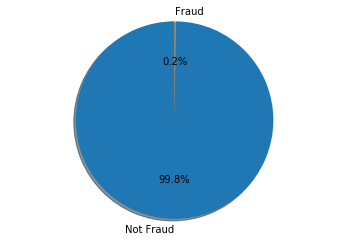

In [8]:
# Plotting a Pie chart to display  fraud and non fraud credit transactions
import matplotlib.pyplot as plt

labels = 'Not Fraud', 'Fraud'
sizes = [my_tab["count"][0], my_tab["count"][1]]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#Only 492 (or 0.2%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.

# Data Exploration

In [9]:
#Plotting time density for the Credit Card transaction dataset
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
Genuine_transaction = credit_dataset.loc[credit_dataset['Class'] == 0]["Time"]
fraud_transaction = credit_dataset.loc[credit_dataset['Class'] == 1]["Time"]
hist_data = [Genuine_transaction, fraud_transaction]
group_labels = ['Genuine transaction', 'Fraud transaction']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Time Density Plot for Credit Card Transactions', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

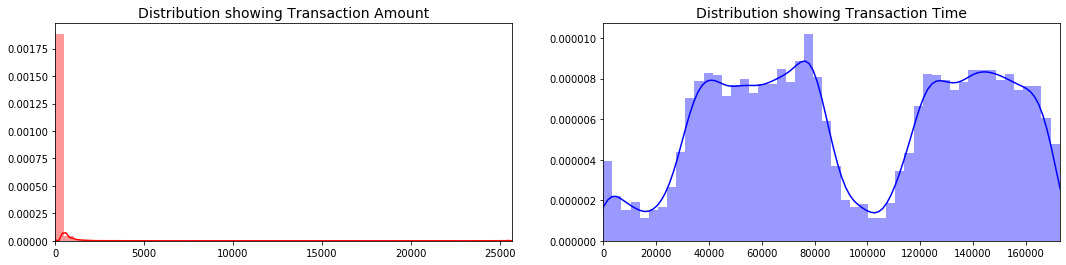

In [10]:
#Distribution of transaction Amount Vs Transaction time
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = credit_dataset['Amount'].values
time_val = credit_dataset['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution showing Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution showing Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [11]:
genuine_transaction = credit_dataset.loc[credit_dataset['Class'] == 0]["Amount"]
fraud_transaction = credit_dataset.loc[credit_dataset['Class'] == 1]["Amount"]
genuine_transaction.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud_transaction.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Transactions Amount

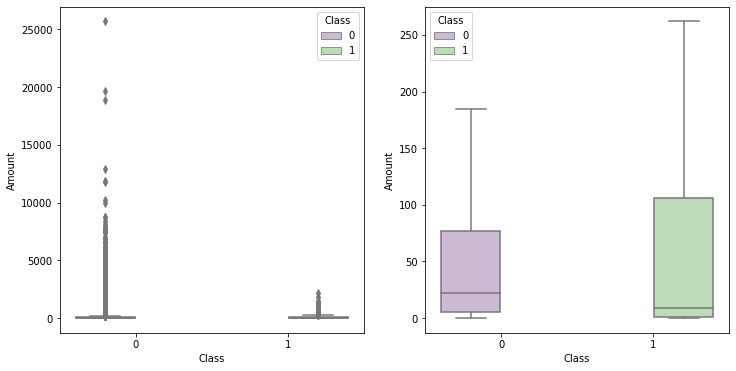

In [13]:
#BOXPLOT  to display fraud and genuine transactions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=credit_dataset, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=credit_dataset, palette="PRGn",showfliers=False)
plt.show();

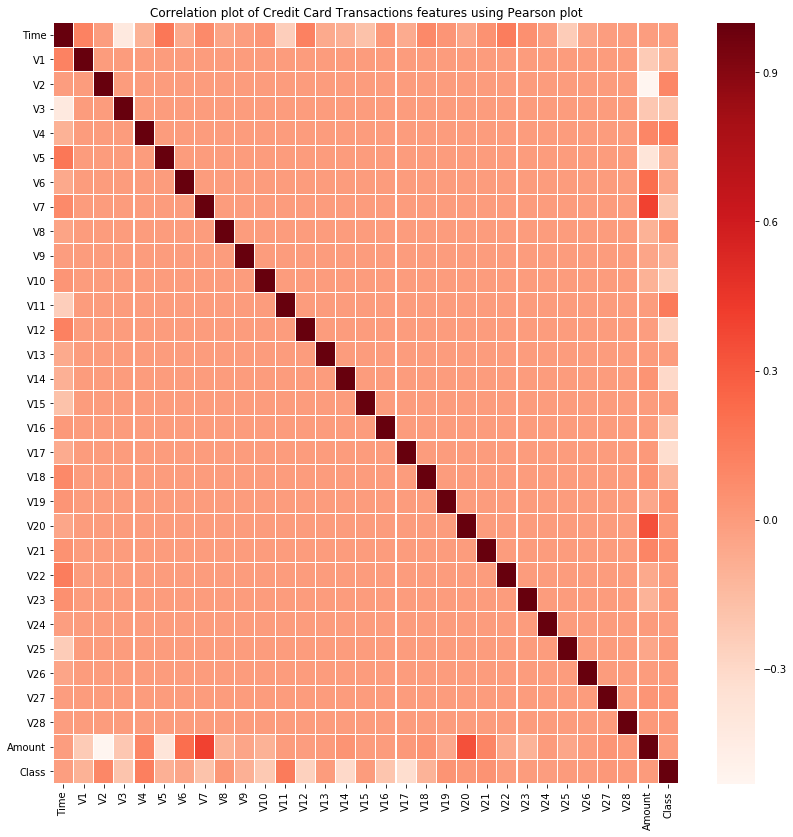

In [15]:
#Plotting correlation of Features
plt.figure(figsize = (14,14))
plt.title('Correlation plot of Credit Card Transactions features using Pearson plot')
corr = credit_dataset.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

Let's plot the correlated and inverse correlated values on the same graph.

Let's start with the direct correlated values: {V20;Amount} and {V7;Amount}.

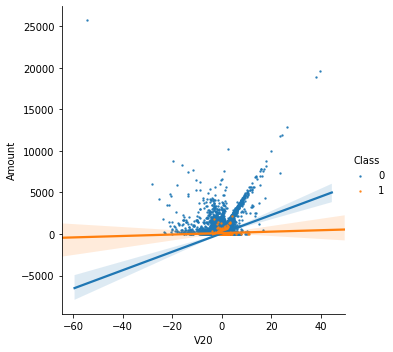

In [16]:
#Plotting an Implot to show the linear regression between feature V20 and Class of transactions
s = sns.lmplot(x='V20', y='Amount',data=credit_dataset, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()


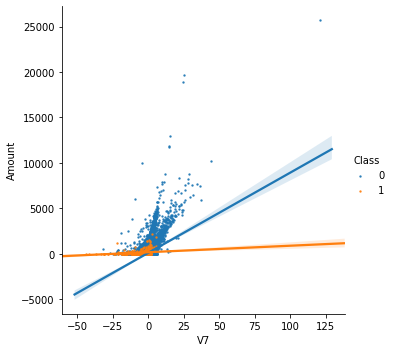

In [17]:
#Plotting an Implot to show the linear regression between feature V7 and Class of transactions
s = sns.lmplot(x='V7', y='Amount',data=credit_dataset, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

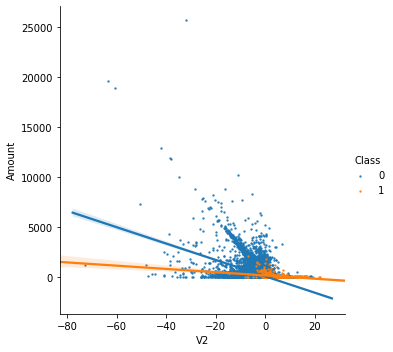

In [18]:
#Plotting an Implot to show the linear regression between feature V2 and Class of transactions
s = sns.lmplot(x='V2', y='Amount',data=credit_dataset, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

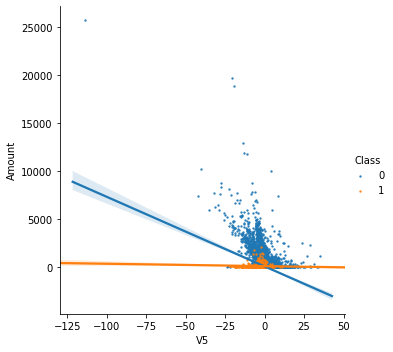

In [19]:
#Plotting an Implot to show the linear regression between feature V5 and Class of transactions
s = sns.lmplot(x='V5', y='Amount',data=credit_dataset, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show

We can confirm that the two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).

<Figure size 432x288 with 0 Axes>

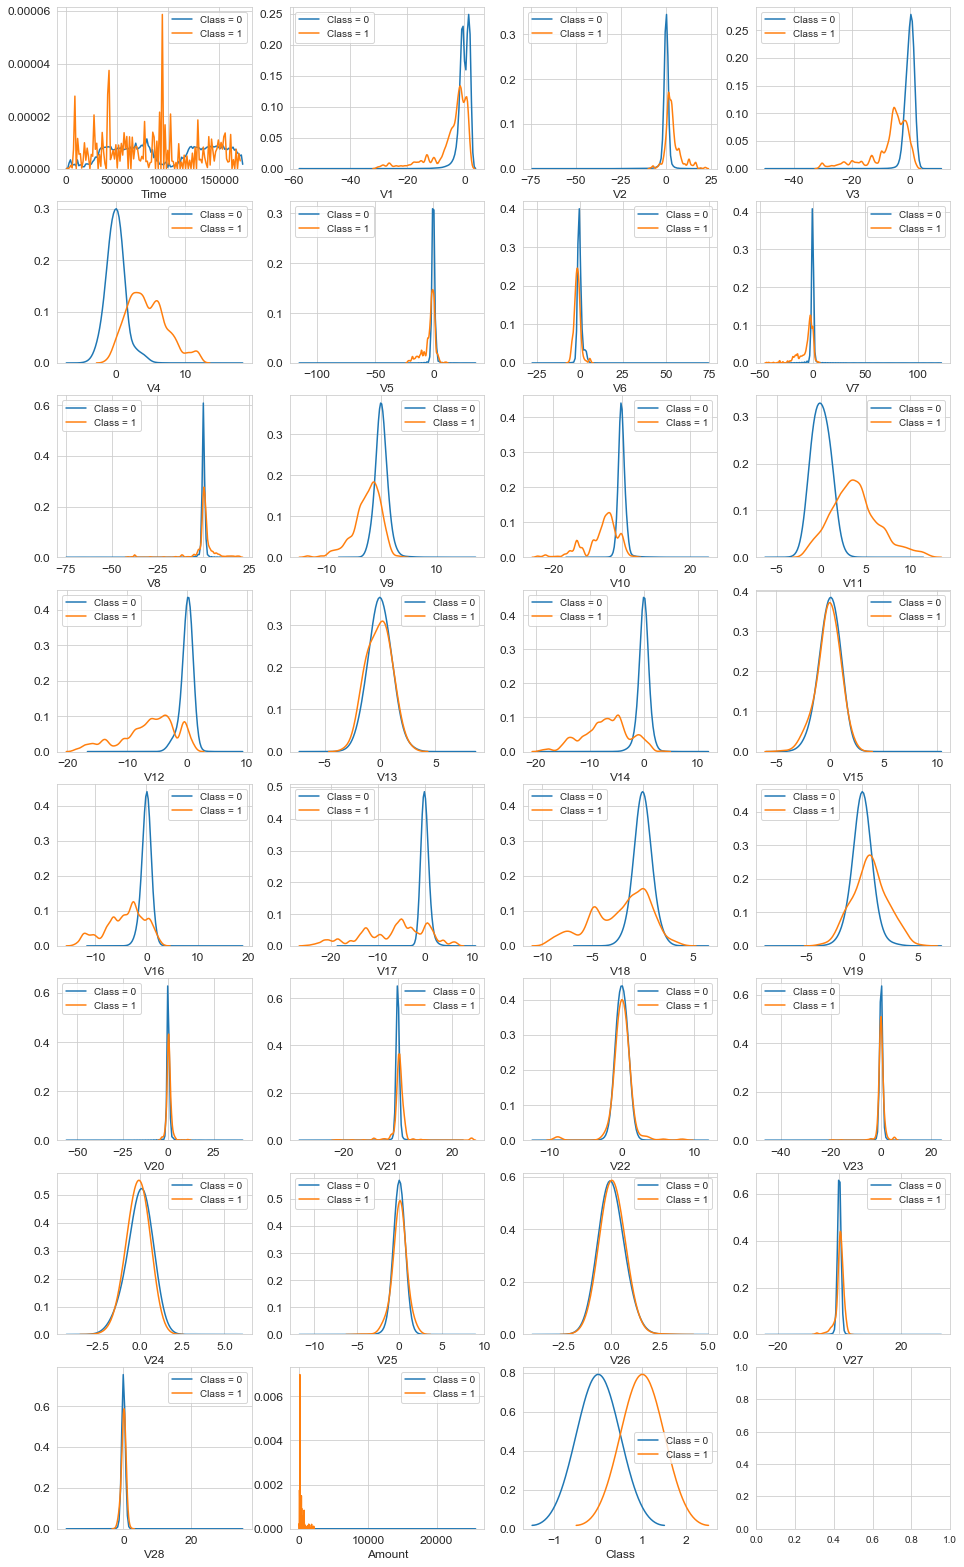

In [20]:
#Plotting feature density visualization
val = credit_dataset.columns.values

i = 0
genuine = credit_dataset.loc[credit_dataset['Class'] == 0]
fraud = credit_dataset.loc[credit_dataset['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in val:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(genuine[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(fraud[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

In [38]:
#Upsampling of data
from sklearn import model_selection
from sklearn.utils import resample

# Separating the input features and target
y = credit_dataset["Class"]
X = credit_dataset.drop('Class', axis=1)

# setting up the testing and training sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
genuine_tr = X[X.Class==0]
fraud_tr= X[X.Class==1]

# upsample minority
upsampled_data = resample(fraud_tr,
                          replace=True, # sample with replacement
                          n_samples=len(genuine_tr), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([genuine_tr, upsampled_data])

# check new class counts
upsampled.Class.value_counts()
X_train = upsampled.drop('Class', axis=1)
y_train = upsampled.Class

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)
upsampled_pred = upsampled.predict(X_test)


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, upsampled_pred)

0.9807589674447347

In [35]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

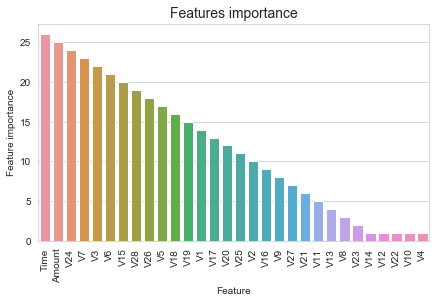

In [36]:
# Features Importance
from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
rfe = RFE(upsampled, 5)
rfe = rfe.fit(X_train, y_train)
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': rfe.ranking_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 
# print(rfe.support_)
# print(rfe.ranking_)

The most important features are Time, Amount, V24, V7, V3, V6 and V15

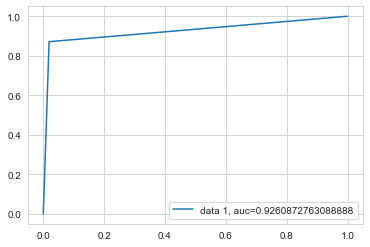

In [23]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  upsampled_pred)
auc = metrics.roc_auc_score(y_test, upsampled_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()